#**Support Vector Machine - Regression (Sklearn)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_diabetes, load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, explained_variance_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

**Code**

In [2]:
# Load Dataset
data = {
    'Position': ['Business Analyst', 'Junior Consultant', 'Senior Consultant', 'Manager',
                 'Country Manager', 'Region Manager', 'Partner', 'Senior Partner', 'C-level', 'CEO'],
    'Level': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]
}

df = pd.DataFrame(data)
print(df.shape)
df.head()

(10, 3)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [4]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [5]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

**Train**

In [6]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #rbf = Gaussian Radial Basis Function Kernel
regressor.fit(X, y)

SVR()

**Prediction**

In [7]:
# Predicting a new result
y_pred = regressor.predict(X_test)
y_pred

array([129998.84659589, 129997.08281   ])

In [8]:
gyan = regressor.predict(sc_X.transform(np.array([[69.5]])))
gyan

array([130000.00000029])

**Accuracy**

In [9]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)
print("Explained Variance Score : ", evs)
print("R2 Score : ", r2)

Mean Squared Error :  70900998626.93306
Mean Absolute Error :  220000.88189294693
Explained Variance Score :  -8.017224677470125e-06
R2 Score :  -0.4648966658457243


**Visualization**

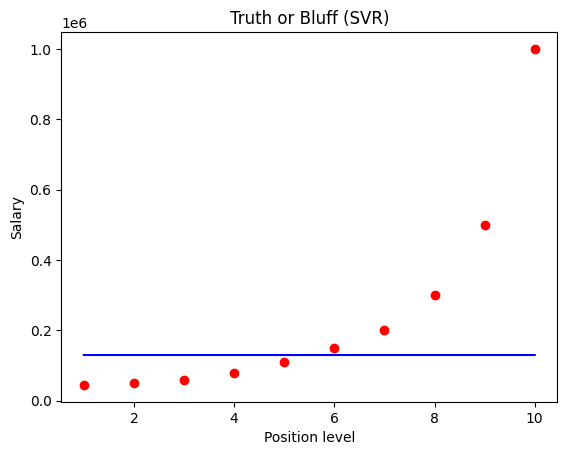

In [10]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<ipython-input-11-4aa652a380f9>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled


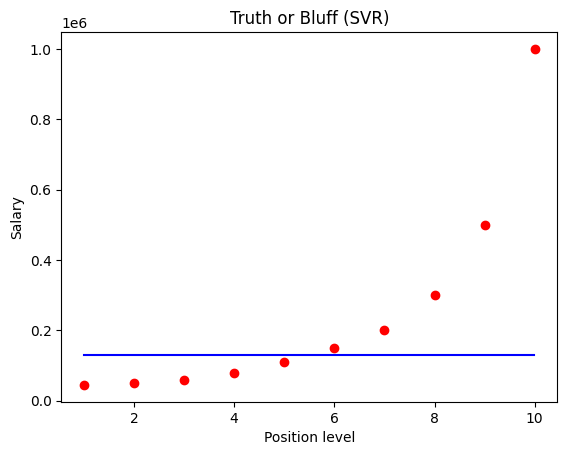

In [11]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()